<a href="https://colab.research.google.com/github/adhar1saij/Post_Srugery_Survival_Prediction/blob/main/Machine_Learning_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Statements

In [56]:
#!git clone https://github.com/adhar1saij/Post_Srugery_Survival_Prediction

fatal: destination path 'Post_Srugery_Survival_Prediction' already exists and is not an empty directory.


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Retrieving training data from csv

In [89]:
train_file_path  = '/content/Post_Srugery_Survival_Prediction/data_train.csv'
train_data = pd.read_csv(train_file_path)
x_train = train_data.iloc[:,:-1].values
y_train = train_data.iloc[:,-1].values
print(y_train)

[1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1
 1 1 2 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1
 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 2]


Converting the retrived data into a Dataframe for ease of operations

In [83]:
train_data_frame = pd.DataFrame(np.array(train_data), columns = ['Age','Year','Lumps','Class'])
x_train = train_data[0]
#y_train = train_data_frame[-1]
print(x_train)

[38 66 11  1]


Group by Classes to determine the distribution

In [60]:
classes = train_data_frame.groupby('Class').groups
print("----- Claases distribution -----")
print(classes)
c1_total = len(classes[1])
c2_total = len(classes[2])
print("Number of Samples of Class 1 : " + str(c1_total))
print("Number of Samples of Class 2 : " + str(c2_total))


----- Claases distribution -----
{1: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 35, 36, 37, 38, 39, 40, 41, 45, 46, 47, 48, 52, 53, 54, 55, 56, 57, 62, 63, 64, 68, 69, 70, 71, 72, 73, 74, 75, 79, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 107, 108, 109, 110, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 131, 132, 133, 134, 135, 140, 141, 142, 143, 144, 145, ...], 2: [3, 12, 13, 14, 22, 23, 31, 32, 33, 34, 42, 43, 44, 49, 50, 51, 58, 59, 60, 61, 65, 66, 67, 76, 77, 78, 83, 84, 93, 94, 105, 106, 111, 112, 113, 114, 125, 126, 127, 128, 129, 130, 136, 137, 138, 139, 149, 150, 161, 162, 167, 168, 169, 176, 177, 178, 183, 196, 197, 198, 199, 206, 207, 211, 212, 219, 223, 224, 231, 237, 242, 243]}
Number of Samples of Class 1 : 172
Number of Samples of Class 2 : 72


As we can see, the classes are not equally distributed


Feature 

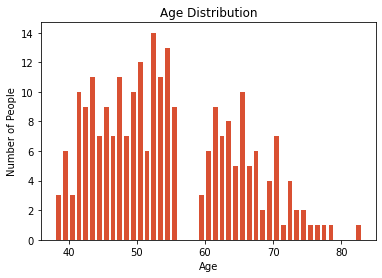

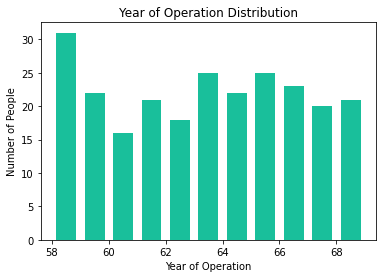

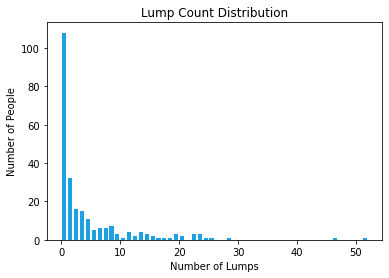

In [61]:
age_min = min(train_data_frame['Age'])
age_max = max(train_data_frame['Age'])
plt.hist(train_data_frame['Age'], bins=age_max-age_min, rwidth=0.7, color='#D95032') 
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')
plt.show()

year_min = min(train_data_frame['Year'])
year_max = max(train_data_frame['Year'])
plt.hist(train_data_frame['Year'], bins=year_max-year_min, rwidth=0.7, color='#19BF9B') 
plt.xlabel('Year of Operation')
plt.ylabel('Number of People')
plt.title('Year of Operation Distribution')
plt.show()

lump_min = min(train_data_frame['Lumps'])
lump_max = max(train_data_frame['Lumps'])
plt.hist(train_data_frame['Lumps'], bins=lump_max-lump_min, rwidth=0.7, color='#1EA1E3') 
plt.xlabel('Number of Lumps')
plt.ylabel('Number of People')
plt.title('Lump Count Distribution')
plt.show()

2D Scatter Plots for each pair of features

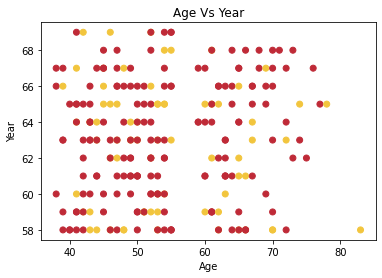

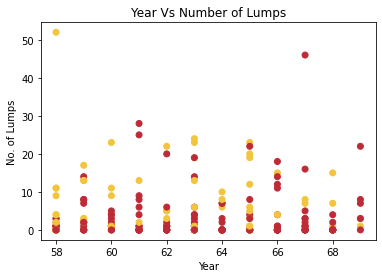

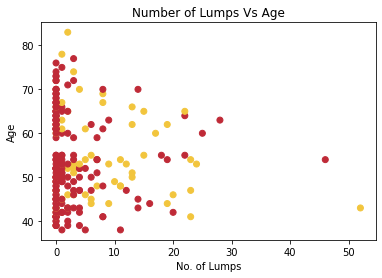

In [62]:
plt.scatter(train_data_frame['Age'],train_data_frame['Year'], c = train_data_frame['Class'].map({1:'#BF2A37',2:'#F2C53D'}))
plt.xlabel('Age')
plt.ylabel('Year')
plt.title('Age Vs Year')
plt.show()

plt.scatter(train_data_frame['Year'],train_data_frame['Lumps'], c = train_data_frame['Class'].map({1:'#BF2A37',2:'#F2C53D'}))
plt.xlabel('Year')
plt.ylabel('No. of Lumps')
plt.title('Year Vs Number of Lumps')
plt.show()

plt.scatter(train_data_frame['Lumps'],train_data_frame['Age'], c = train_data_frame['Class'].map({1:'#BF2A37',2:'#F2C53D'}))
plt.xlabel('No. of Lumps')
plt.ylabel('Age')
plt.title('Number of Lumps Vs Age')
plt.show()



# New Section 
Euclidean Distance

In [63]:
def euclidean_distance(x,y):
  sum = 0
  # x = x[:-1]
  # y = y[:-1]
  for i in range(0,len(x)-1):
    sum += (x[i]-y[i])**2
  euc_dist = [math.sqrt(sum),x[len(x)-1]]
  return euc_dist

euclidean_distance([1,2,3,4],[2,3,4,5])

[1.7320508075688772, 4]

Voting Algorithm

In [64]:
def voting(vlist):
  class1 = 0
  class2 = 0
  for i in vlist:
    if(i[1]==1):
      class1 += 1
    else:
      class2 += 1
  if(class1 > class2):
    return 1
  else:
    return 2

KNN Algorithm

In [65]:
def knn(k,train_dataset,test_datapoint):
  ed_list = []
  for point in train_dataset:
    ed_list.append(euclidean_distance(point,test_datapoint))
  ed_list.sort()
  vote = ed_list[:k]
  pred = voting(vote)
  return pred
  

#print(knn(3,[[38,69,2,1]],[33,69,1,1]))

Import Dev Data

In [86]:
dev_file_path  = '/content/Post_Srugery_Survival_Prediction/data_dev.csv'
dev_data = pd.read_csv(dev_file_path, sep=',')
dev_data = np.array(dev_data)
c1_test = sum(map(lambda x : x[3] == 1, dev_data))
c2_test = sum(map(lambda x : x[3] == 2, dev_data))
train_data = np.array(train_data)
print(c2_test)

3


Calculate Accuracy of the KNN

In [76]:
asum = 0
bsum = 0

for dp in dev_data:
  pred = knn(5,train_data,dp)
  print(pred)
  if (dp[-1] == 1 and dp[-1] == pred):
    asum += 1
  elif(dp[-1] == 2 and dp[-1] == pred):
    bsum += 1
print(asum)
print(bsum)
bacc = 0.5 * (asum/c1_test) + 0.5 * (bsum/c2_test)
print(bacc)
print((asum+bsum)/len(dev_data))



1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
25
1
0.6474358974358975
0.896551724137931
